## Where the data at?

In [1]:
input_path = '../Data/Intermediate_Files/'
clinical_data_path = '../Data/Raw_Data/Clinical_Data/'
output_path = '../Data/Processed_Data/'
# read files

import pandas as pd
x_train_m = pd.read_pickle(output_path + 'x_train_m.pkl')
df3 = pd.read_pickle(output_path + 'df3.pkl')

## Run CoxPH-EWAS unadjusted with OS and EFS as outcome

In [2]:
import methylize

# ewasOS_un = methylize.diff_meth_pos(meth_data=x_train_m,
#                                     duration=df3['os.time'],
#                                     event_observed=df3['os.evnt'],
#                                     pheno_data=df3['os.evnt'],
#                                     covariates=False,
#                                     regression_method="coxph",
#                                     export='pkl',
#                                     verbose=True,
#                                     filename=output_path + 'ewas_cog_os_unadjusted')

ewasOS_un = pd.read_pickle(output_path + 'ewas_cog_os_unadjusted.pkl')

/home/fmarchi/projects/MethylScore/Code/.venv_py38/lib/python3.8/site-packages/methylize/diff_meth_pos.py:15: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
Probes: 100%|██████████| 333351/333351 [45:38<00:00, 121.72it/s] 


Saved ../Data/Processed_Data/ewas_cog_os_unadjusted.


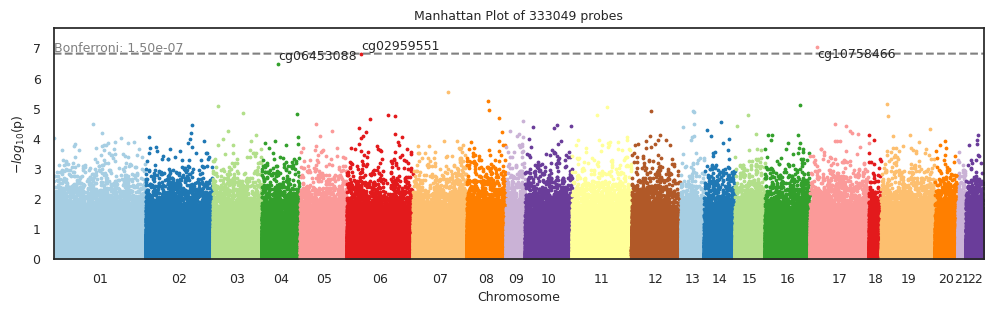

In [3]:
import seaborn as sns
sns.set_theme(style="white")

methylize.manhattan_plot(stats_results=ewasOS_un,
                        palette='Paired',
                        save=False,
                        suggestive=False,
                        significant= False,
                        width=12,
                        height=3,
                        statsmode=False,
                        bonferroni=True,
                        fontsize=9,
                        array_type='450k',
                        explore=False,
                        border = True,
                        label_sig_probes=True,
                        fwer=0.05)


In [17]:
# sort by p-value
ewasOS_un.sort_values(by='PValue').head(10)

,Coefficient,StandardError,HazardsRatio,95%CI_lower,95%CI_upper,ZScore,PValue,FDR_QValue,minuslog10value,chromosome,MAPINFO
cg10758466,-0.240239,0.044954,0.786440,0.720114,0.858876,-5.344147,9.084404e-08,0.026436,7.041704,17,CHR-43896719.0
cg02959551,-0.292930,0.055878,0.746074,0.668680,0.832426,-5.242278,1.586062e-07,0.026436,6.799680,06,CHR-31659209.0
cg06453088,-0.147930,0.028994,0.862492,0.814845,0.912924,-5.102090,3.359236e-07,0.037327,6.473760,04,CHR-5885998.0
cg08122885,0.121177,0.025894,1.128825,1.072965,1.187593,4.679711,2.872789e-06,0.239412,5.541696,07,CHR-38976450.0
cg22272840,0.091995,0.020261,1.096360,1.053675,1.140773,4.540507,5.611907e-06,0.302352,5.250889,08,CHR-10729372.0
cg14125846,-0.370650,0.082376,0.690286,0.587368,0.811237,-4.499463,6.812542e-06,0.302352,5.166691,19,CHR-38948541.0
cg10294820,-0.162761,0.036314,0.849794,0.791413,0.912482,-4.482065,7.392431e-06,0.302352,5.131213,16,CHR-86196092.0
cg18060030,-0.173763,0.038999,0.840496,0.778646,0.907259,-4.455637,8.364463e-06,0.302352,5.077562,03,CHR-169249450.0
cg09755939,-0.376726,0.084731,0.686104,0.581122,0.810052,-4.446153,8.742158e-06,0.302352,5.058381,11,CHR-15115142.0
cg08259755,-0.250416,0.057035,0.778477,0.696141,0.870551,-4.390562,1.130581e-05,0.302352,4.946698,08,CHR-55525161.0


In [10]:
# Define Bonferroni Cutoff
bonferroniOS = ewasOS_un[ewasOS_un['PValue'] <= (0.05/ewasOS_un.shape[0])]

In [15]:
zhou2016_probes = pd.read_csv('../Data/UnreliableProbesList_Zhou2016/EPIC.anno.GRCh38.tsv',
                              sep='\t',index_col=0)[['chrm','start', 'end', 'GeneNames','GeneClasses', 'TranscriptIDs','CGIPosition']]

In [21]:
bonferroniOS[['Coefficient','StandardError','HazardsRatio','ZScore','PValue','FDR_QValue']].join(zhou2016_probes, how='inner')

,Coefficient,StandardError,HazardsRatio,ZScore,PValue,FDR_QValue,chrm,start,end,GeneNames,GeneClasses,TranscriptIDs,CGIPosition
cg10758466,-0.240239,0.044954,0.78644,-5.344147,9.084404e-08,0.026436,chr17,43896718,43896720,MPP2;MPP2;MPP2;MPP2;MPP2;MPP2;MPP2;MPP2;MPP2;M...,protein_coding;protein_coding;protein_coding;p...,ENST00000269095.7;ENST00000377184.6;ENST000004...,N_Shelf


## Transform to M-Values

In [ ]:
# df_methyl_clipped = df_methyl_filtered.clip(0.001, 0.999)
# import math
# import numpy as np

# def beta2m(val):
#     '''Transfrom beta-values into m-values'''
#     return math.log2(val/(1-val))

# x_train_m = df_methyl_clipped.apply(np.vectorize(beta2m))

# # Get correlation between Beta and M Values
# corr = x_train_m.corrwith(df_methyl_filtered, axis=0)

# # Glue them into same dataframe for vizualization purposes
# beta_to_m_values = pd.concat([x_train_m.mean(),df_methyl_filtered.mean(),corr],axis=1,
#                              keys=['M Values','Beta Values','Correlation'],
#                              join= 'inner')

# def draw_scatterplot(df,x,y,hue,s):
    
#     # Define theme

#     sns.set_theme(style="white")
#     f, ax = plt.subplots(figsize=(6, 6))
#     sns.despine(f, left=False, bottom=False)

#     # Define scatterplot

#     sns.scatterplot(x=x, y=y,
#                     hue=hue, palette='flare', s=s,
#                     sizes=(1, 8), linewidth=0, alpha=0.1,
#                     data=df, ax=ax)

#     # Calculate Pearson’s correlation coefficient (r)
#     # and its two-tailed p-value (p)

#     r,p = stats.pearsonr(df[x],df[y])

#     # Annotate r and p into the plot

#     plt.annotate(fr'$\rho$: {r:.5f}, p-value: {p:.5f}',
#                 xy=(6.0, 0.01), xycoords='data',
#                 ha='right', va='center',
#                 bbox={'boxstyle': 'round', 'facecolor': 'none',
#                 'edgecolor': 'lightgray'})

#     # Define plot specs

#     plt.xlabel(x)
#     plt.ylabel(y)
#     plt.title(r"Concordance by Pearson's correlation coefficient ($\rho$) in " + str(len(df)) + ' CpG probes',
#                fontsize = 12) 

#     # Save plot figure
    
#     plt.savefig('../Figures/Beta_to_M_Values_' + str(len(df)) + '_scatterplot' + '.png',
#                  bbox_inches='tight', dpi=300)

#     return(plt.show())
# draw_scatterplot(df=beta_to_m_values,x='M Values',y='Beta Values',hue='Correlation',s=1)